## Import Modules and Load Dataset 

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

plt.style.use('ggplot')

In [107]:
data=pd.read_csv(r'E:\python\project\Breast Cancer Detection\data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Preparing The Dataset

In [70]:
data.shape

(569, 33)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [20]:
data.duplicated().sum()

np.int64(0)

In [21]:
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [108]:
#Removing unnecessary columns and converting non-numeric columns to numeric
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [109]:
#statistical details
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


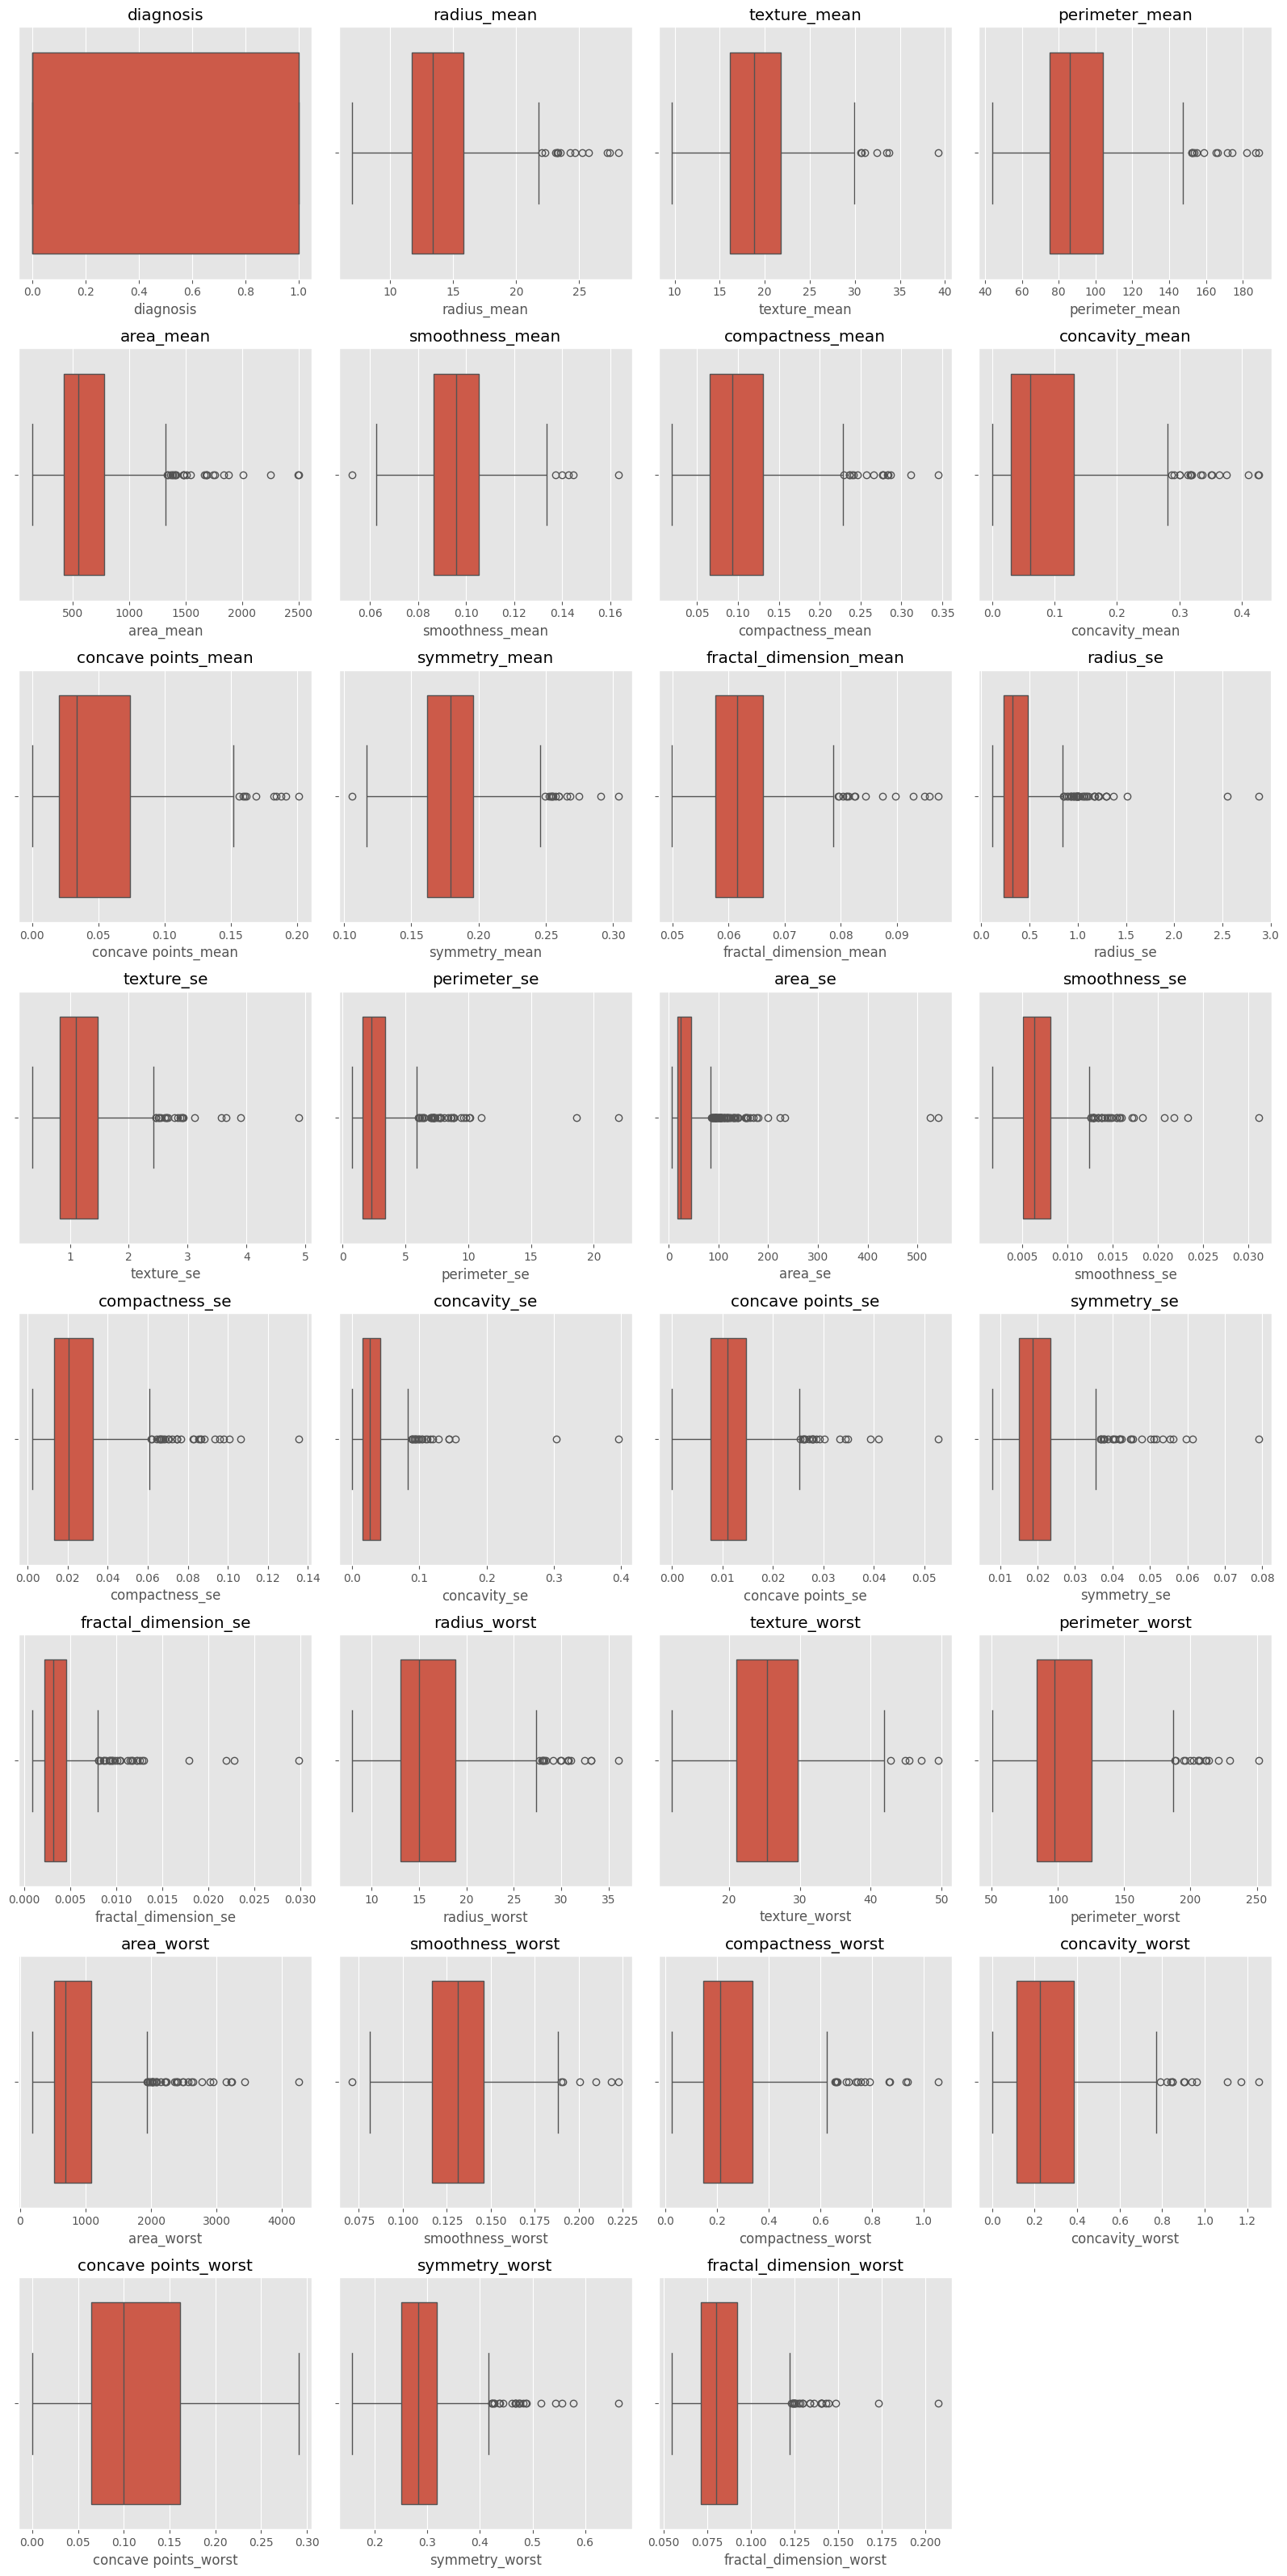

In [114]:
num_columns = len(data.columns)
ncols = 4  
nrows = int(np.ceil(num_columns / ncols))  

plt.figure(figsize=(ncols * 4, nrows * 4))

for i, column in enumerate(data.columns):
    plt.subplot(nrows, ncols, i + 1)  
    sns.boxplot(x=data[column])
    plt.title(column)  

plt.tight_layout()  
plt.show()

## Handling Outliers

In [75]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
((data >upper_limit) |(data < lower_limit)).sum().sum()
outliers=((data >upper_limit) |(data < lower_limit))

from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
df =data.copy()
df[((df >upper_limit) |(df < lower_limit))]=np.nan
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_df)
imputed_df = pd.DataFrame(imputed_data, columns=scaled_df.columns)


original_scale_data = scaler.inverse_transform(imputed_data)
dataset= pd.DataFrame(original_scale_data, columns=scaled_df.columns)

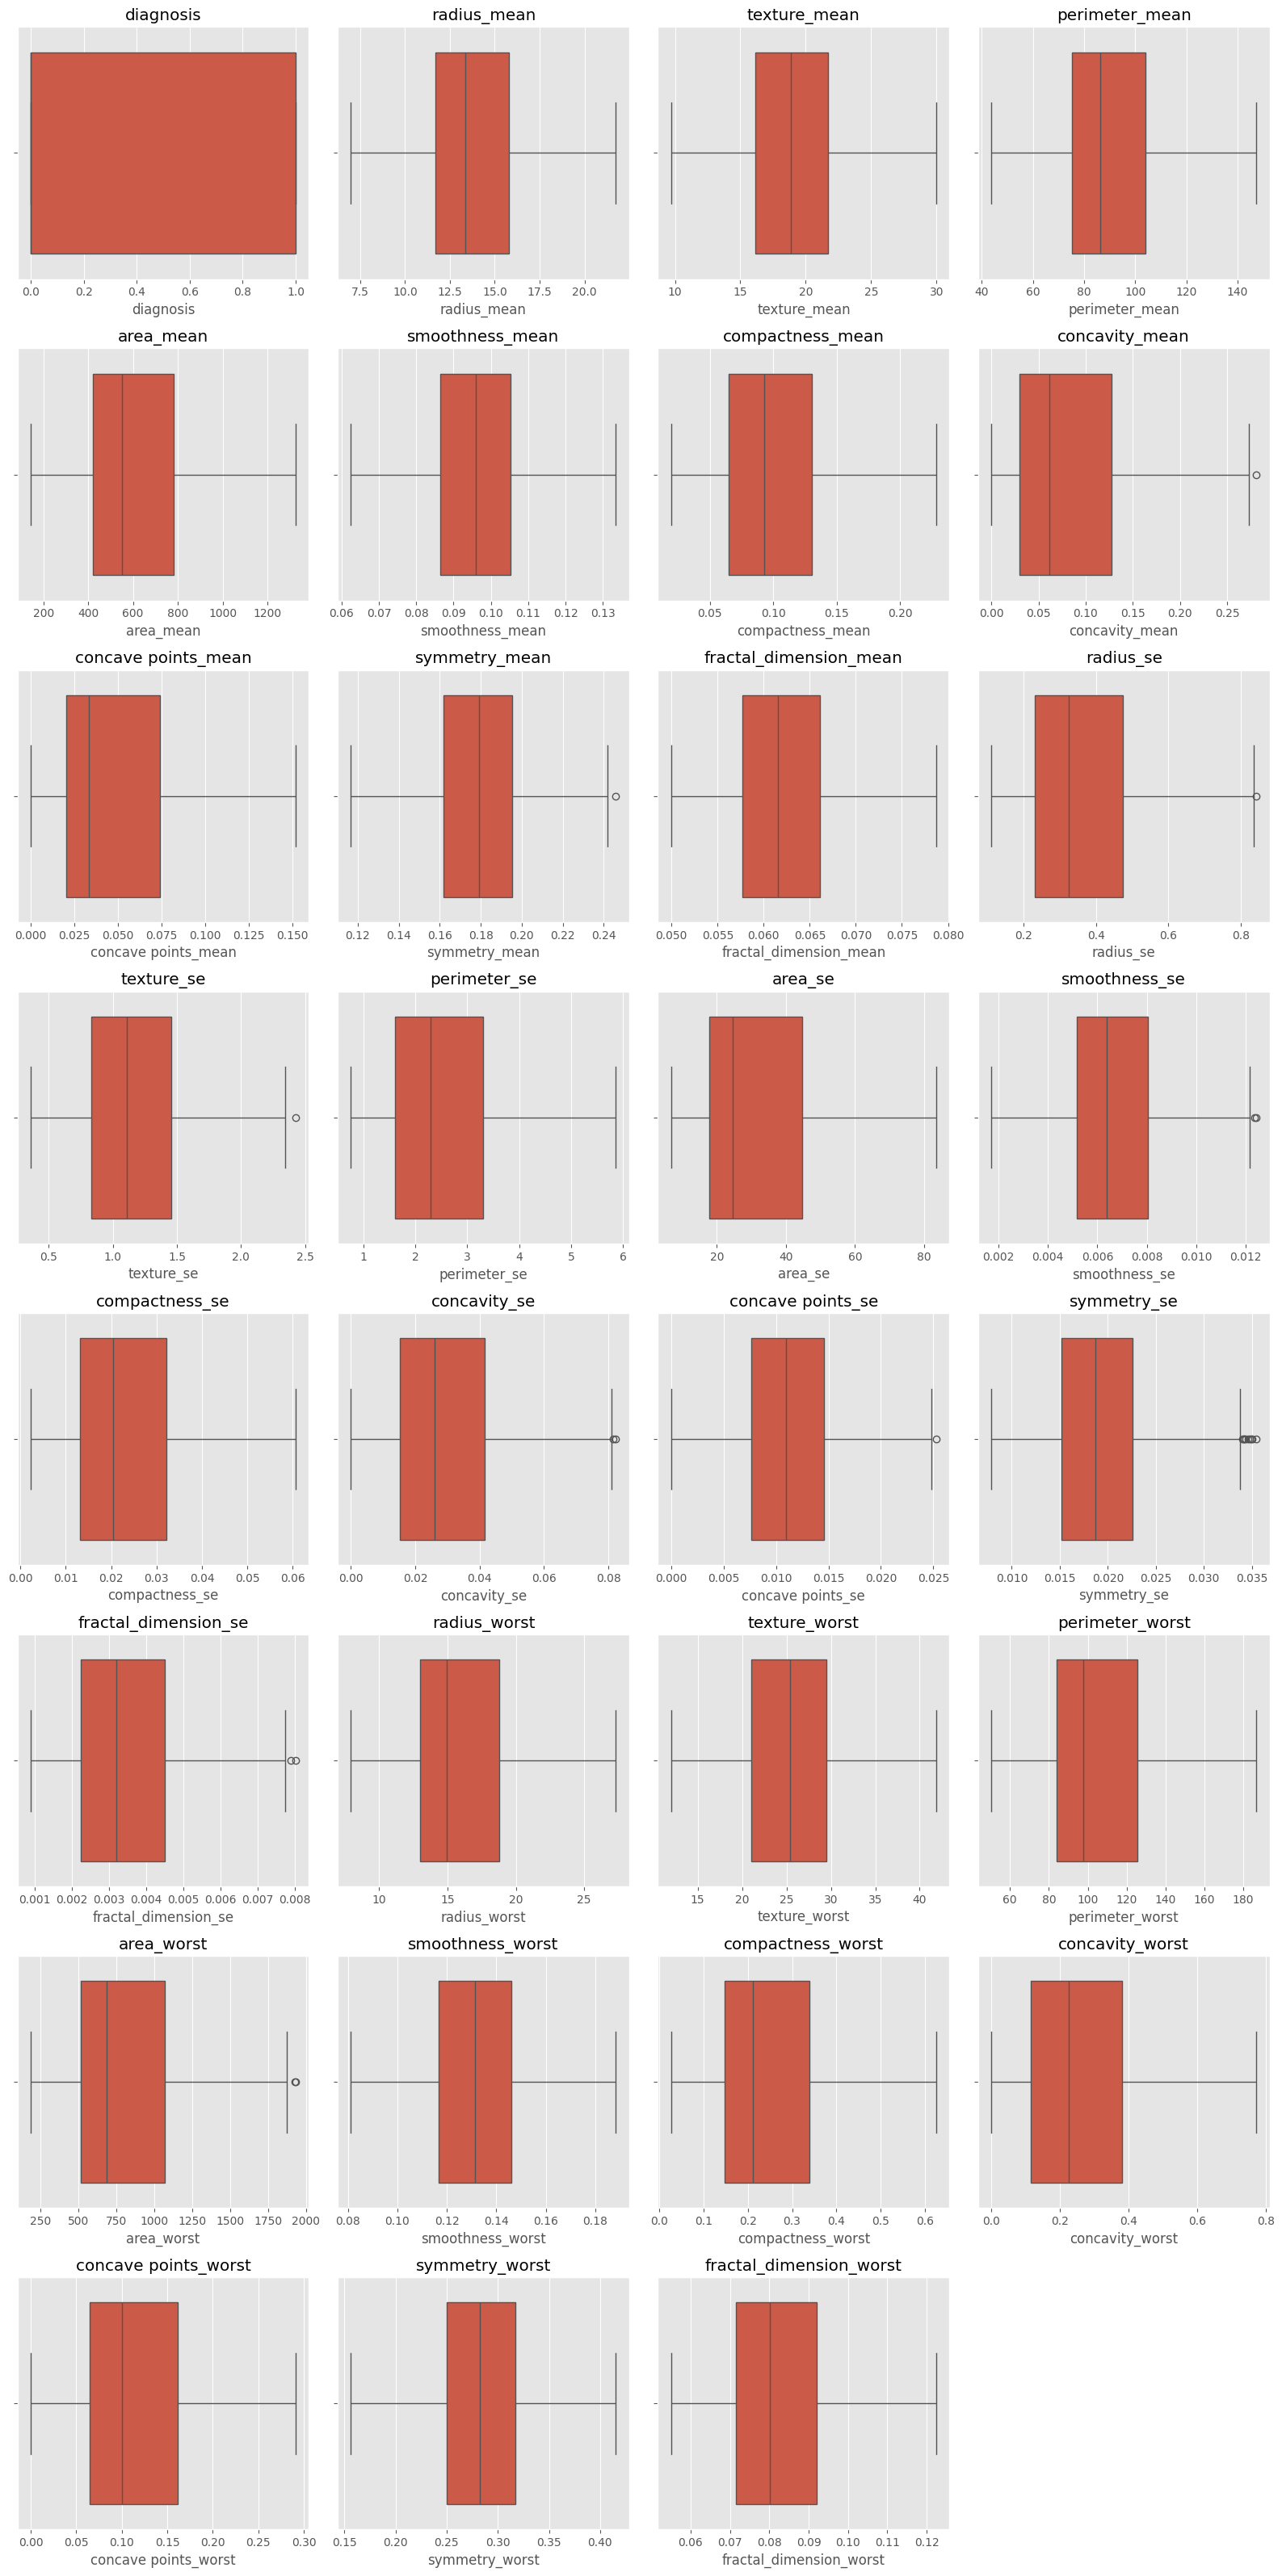

In [76]:
plt.figure(figsize=(ncols * 4, nrows * 4))

for i, column in enumerate(dataset.columns):
    plt.subplot(nrows, ncols, i + 1)  
    sns.boxplot(x=dataset[column])
    plt.title(column)  

plt.tight_layout()  
plt.show()

## Analyzing The Correlated Features

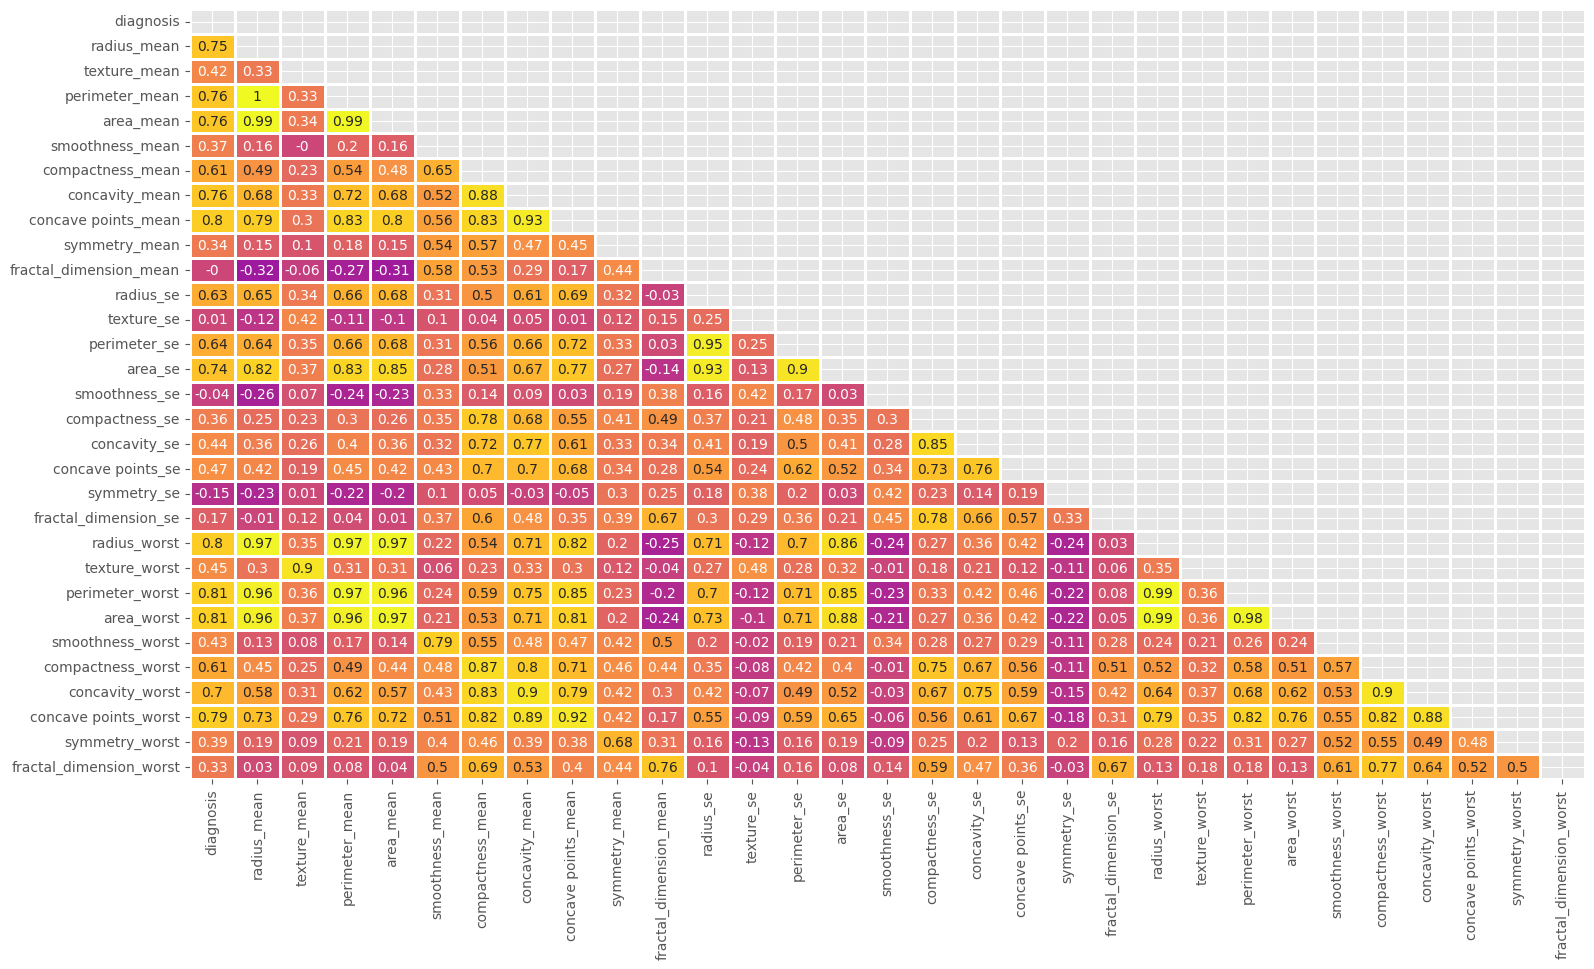

In [78]:
def corrMat(df,id=False):
    
    corr_mat = df.select_dtypes(include=[np.number]).corr().round(2)
    f, ax = plt.subplots(figsize=(18,10))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()  


corrMat(dataset)

In [79]:
#drop highly correlated features
def drop_highly_correlated_columns(X, y, threshold):

    corr_matrix = X.corr().abs()

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    tri_df = corr_matrix.mask(mask)

    correlated_pairs = [(col1, col2) for col1 in tri_df.columns 
                        for col2 in tri_df.index 
                         if not pd.isna(tri_df.loc[col2, col1]) > threshold]

    to_drop = set()
    for col1, col2 in correlated_pairs:
        target_corr_col1 = abs(X[col1].corr(y))
        target_corr_col2 = abs(X[col2].corr(y))

        if target_corr_col1 < target_corr_col2:
            to_drop.add(col1)
        else:
            to_drop.add(col2)

    X = X.drop(columns=to_drop)
    
    return X, to_drop


threshold = 0.92
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']


reduced_X_train, dropped_features = drop_highly_correlated_columns(X, y, threshold)

print("dropped_features:", dropped_features)



dropped_features: {'smoothness_worst', 'texture_se', 'fractal_dimension_mean', 'compactness_worst', 'area_se', 'concave points_mean', 'radius_se', 'concavity_worst', 'concavity_se', 'fractal_dimension_se', 'fractal_dimension_worst', 'radius_worst', 'radius_mean', 'smoothness_mean', 'symmetry_se', 'smoothness_se', 'perimeter_se', 'concavity_mean', 'texture_mean', 'compactness_mean', 'concave points_worst', 'symmetry_worst', 'area_mean', 'perimeter_mean', 'area_worst', 'texture_worst', 'compactness_se', 'concave points_se', 'symmetry_mean'}


### Balance data

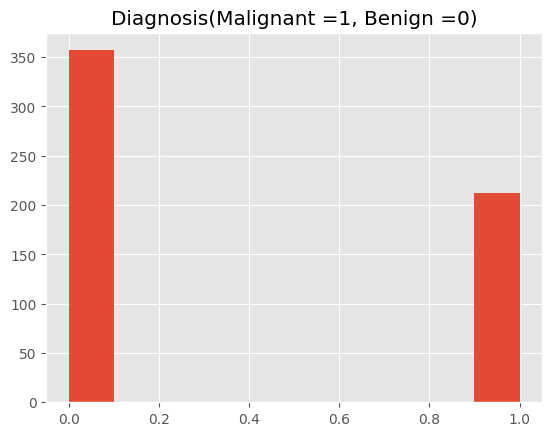

diagnosis
0.0    62.741652
1.0    37.258348
Name: proportion, dtype: float64


In [58]:
plt.hist(y)
plt.title('Diagnosis(Malignant =1, Benign =0)')
plt.show()
distribution = y.value_counts(normalize=True) * 100
print(distribution)

The dataset shows moderate class imbalance (62.74% vs. 37.26%), requiring balancing techniques for better model performance.

In [80]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)
resampled_dataset = pd.concat([pd.DataFrame(X_resampled_smote, columns=X.columns), 
                                pd.Series(y_resampled_smote, name='diagnosis')], axis=1)

pd.Series(y_resampled_smote).value_counts()


diagnosis
1.0    357
0.0    357
Name: count, dtype: int64

## Split data into train and test and evaluate model

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)


In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
def evaluate_model(y_true, y_pred):

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]  # True Negatives
    fp = cm[0, 1]  # False Positives
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "specificity": specificity
    }
    return metrics

In [84]:
def train_logistic_regression():
    param_grid_lr = {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    }
    grid_search_lr = GridSearchCV(
        estimator=LogisticRegression(random_state=42),
        param_grid=param_grid_lr,
        cv=5,
        scoring='accuracy'
    )
    grid_search_lr.fit(X_train_scaled, y_train)
    best_model = grid_search_lr.best_estimator_
    best_params = grid_search_lr.best_params_  # Best parameters
    y_pred = best_model.predict(X_test_scaled)
    metrics = evaluate_model(y_test, y_pred)
    return metrics, best_params


In [85]:
def train_random_forest():
    param_grid_rf = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    grid_search_rf = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid_rf,
        cv=5,
        scoring='accuracy'
    )
    grid_search_rf.fit(X_train, y_train)
    best_model = grid_search_rf.best_estimator_
    best_params = grid_search_rf.best_params_  # Best parameters
    y_pred = best_model.predict(X_test)
    metrics = evaluate_model(y_test, y_pred)
    return metrics, best_params


In [86]:
def train_gradient_boosting():
    param_grid_gb = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    grid_search_gb = GridSearchCV(
        estimator=GradientBoostingClassifier(random_state=42),
        param_grid=param_grid_gb,
        cv=5,
        scoring='accuracy'
    )
    grid_search_gb.fit(X_train, y_train)
    best_model = grid_search_gb.best_estimator_
    best_params = grid_search_gb.best_params_  # Best parameters
    y_pred = best_model.predict(X_test)
    metrics = evaluate_model(y_test, y_pred)
    return metrics, best_params


In [87]:
def train_svm():
    param_grid_svm = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
    grid_search_svm = GridSearchCV(
        estimator=SVC(random_state=42),
        param_grid=param_grid_svm,
        cv=5,
        scoring='accuracy'
    )
    grid_search_svm.fit(X_train_scaled, y_train)
    best_model = grid_search_svm.best_estimator_
    best_params = grid_search_svm.best_params_  # Best parameters
    y_pred = best_model.predict(X_test_scaled)
    metrics = evaluate_model(y_test, y_pred)
    return metrics, best_params


In [88]:
def train_knn():
    param_grid_knn = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    grid_search_knn = GridSearchCV(
        estimator=KNeighborsClassifier(),
        param_grid=param_grid_knn,
        cv=5,
        scoring='accuracy'
    )
    grid_search_knn.fit(X_train_scaled, y_train)
    best_model = grid_search_knn.best_estimator_
    best_params = grid_search_knn.best_params_  
    y_pred = best_model.predict(X_test_scaled)
    metrics = evaluate_model(y_test, y_pred)
    return metrics, best_params


In [89]:
# Logistic Regression
metrics_lr, best_params_lr = train_logistic_regression()
print(f"Logistic Regression Metrics: {metrics_lr}")
print(f"Best Parameters (Logistic Regression): {best_params_lr}")

# Random Forest
metrics_rf, best_params_rf = train_random_forest()
print(f"Random Forest Metrics: {metrics_rf}")
print(f"Best Parameters (Random Forest): {best_params_rf}")

# Gradient Boosting
metrics_gb, best_params_gb = train_gradient_boosting()
print(f"Gradient Boosting Metrics: {metrics_gb}")
print(f"Best Parameters (Gradient Boosting): {best_params_gb}")

# SVM
metrics_svm, best_params_svm = train_svm()
print(f"SVM Metrics: {metrics_svm}")
print(f"Best Parameters (SVM): {best_params_svm}")

# KNN
metrics_knn, best_params_knn = train_knn()
print(f"KNN Metrics: {metrics_knn}")
print(f"Best Parameters (KNN): {best_params_knn}")



Logistic Regression Metrics: {'accuracy': 0.986013986013986, 'precision': np.float64(0.986013986013986), 'recall': np.float64(0.986013986013986), 'f1_score': np.float64(0.986013986013986), 'specificity': np.float64(0.9855072463768116)}
Best Parameters (Logistic Regression): {'C': 0.1, 'solver': 'liblinear'}
Random Forest Metrics: {'accuracy': 0.972027972027972, 'precision': np.float64(0.9723713050500166), 'recall': np.float64(0.972027972027972), 'f1_score': np.float64(0.9720087755381873), 'specificity': np.float64(0.9565217391304348)}
Best Parameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Gradient Boosting Metrics: {'accuracy': 0.965034965034965, 'precision': np.float64(0.9658069203523748), 'recall': np.float64(0.965034965034965), 'f1_score': np.float64(0.9649937994308855), 'specificity': np.float64(0.9420289855072463)}
Best Parameters (Gradient Boosting): {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
SVM Metrics: {'accuracy': 0.

In [90]:
results = {
    "Algorithm": ["Logistic Regression", "Random Forest", "Gradient Boosting", "SVM", "KNN"],
    "Accuracy": [metrics_lr["accuracy"], metrics_rf["accuracy"], metrics_gb["accuracy"], metrics_svm["accuracy"], metrics_knn["accuracy"]],
    "Precision": [metrics_lr["precision"], metrics_rf["precision"], metrics_gb["precision"], metrics_svm["precision"], metrics_knn["precision"]],
    "Recall": [metrics_lr["recall"], metrics_rf["recall"], metrics_gb["recall"], metrics_svm["recall"], metrics_knn["recall"]],
    "F1-Score": [metrics_lr["f1_score"], metrics_rf["f1_score"], metrics_gb["f1_score"], metrics_svm["f1_score"], metrics_knn["f1_score"]],
    "specificity": [metrics_lr["specificity"], metrics_rf["specificity"], metrics_gb["specificity"], metrics_svm["specificity"], metrics_knn["specificity"]],
}

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by=["F1-Score", "Recall", "specificity", "Accuracy", "Precision"], ascending=False)

print(results_df)

             Algorithm  Accuracy  Precision    Recall  F1-Score  specificity
0  Logistic Regression  0.986014   0.986014  0.986014  0.986014     0.985507
3                  SVM  0.986014   0.986382  0.986014  0.986004     0.971014
1        Random Forest  0.972028   0.972371  0.972028  0.972009     0.956522
4                  KNN  0.972028   0.973462  0.972028  0.971979     0.942029
2    Gradient Boosting  0.965035   0.965807  0.965035  0.964994     0.942029
